In [1]:
%pylab inline
import platform
import IPython
import sklearn as sk
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

print ('Python version:', platform.python_version())
print ('IPython version:', IPython.__version__)
print ('numpy version:', np.__version__)
print ('scikit-learn version:', sk.__version__)
print ('matplotlib version:', matplotlib.__version__)

Populating the interactive namespace from numpy and matplotlib
Python version: 3.5.2
IPython version: 4.0.1
numpy version: 1.13.1
scikit-learn version: 0.18.2
matplotlib version: 1.5.0


In [2]:
#Ignore warnings 
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# Principal Component Analysis

Principal Component Analysis (PCA) is an orthogonal linear transformation that
turns a set of possibly correlated variables into a new set of variables that are as
uncorrelated as possible. The new variables lie in a new coordinate system such
that the greatest variance is obtained by projecting the data in the first coordinate,
the second greatest variance by projecting in the second coordinate, and so on.
These new coordinates are called principal components; we have as many principal
components as the number of original dimensions, but we keep only those with
high variance. Each new principal component that is added to the principal
components set must comply with the restriction that it should be orthogonal
(that is, uncorrelated) to the remaining principal components. PCA can be seen
as a method that reveals the internal structure of data; it supplies the user with a
lower dimensional shadow of the original objects. If we keep only the first principal
components, data dimensionality is reduced and thus it is easier to visualize the
structure of data. If we keep, for example, only the first and second components, we
can examine data using a two-dimensional scatter plot. As a result, PCA is useful for
exploratory data analysis before building predictive models.

For our learning methods, PCA will allow us to reduce a high-dimensional space
into a low-dimensional one while preserving as much variance as possible. It
is an unsupervised method since it does not need a target class to perform its
transformations; it only relies on the values of the learning attributes. This is very
useful for two major purposes:
    
- Visualization: Projecting a high-dimensional space, for example, into
two dimensions will allow us to map our instances into a two-dimensional
graph. Using these graphical visualizations, we can have insights about
the distribution of instances and look at how separable instances from
different classes are. In this section we will use PCA to transform and
visualize a dataset.

- Feature selection: Since PCA can transform instances from high to lower
dimensions, we could use this method to address the curse of dimensionality.
Instead of learning from the original set of features, we can transform our
instances with PCA and then apply a learning algorithm on top of the new
feature space.

As a working example, in this section we will use a dataset of handwritten digits
digitalized in matrices of 8x8 pixels, so each instance will consist initially of 64
attributes. How can we visualize the distribution of instances? Visualizing 64
dimensions at the same time is impossible for a human being, so we will use PCA
to reduce the instances to two dimensions and visualize its distribution in a
two-dimensional scatter graph.

In [4]:
from sklearn.datasets import load_digits
digits = load_digits()
X_digits, y_digits = digits.data, digits.target

In [5]:
print (digits.keys())

dict_keys(['data', 'target', 'DESCR', 'target_names', 'images'])


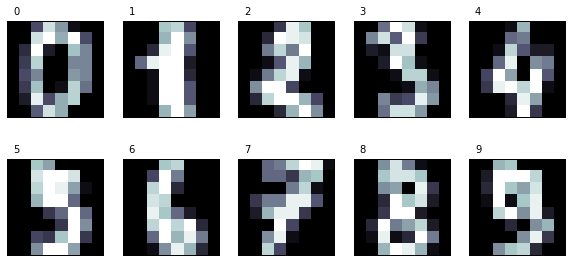

In [8]:
n_row, n_col = 2, 5

def print_digits(images, y, max_n=10):
    # set up the figure size in inches
    fig = plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    i=0
    while i < max_n and i < images.shape[0]:
        p = fig.add_subplot(n_row, n_col, i + 1, xticks=[], yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone, interpolation='nearest')
        # label the image with the target value
        p.text(0, -1, str(y[i]))
        i = i + 1

print_digits(digits.images, digits.target, max_n=10)

Define a function that will plot a scatter with the two-dimensional points that
will be obtained by a PCA transformation. Our data points will also be colored
according to their classes. Recall that the target class will not be used to perform
the transformation; we want to investigate if the distribution after PCA reveals the
distribution of the different classes, and if they are clearly separable. We will use ten
different colors for each of the digits, from 0 to 9.

In [21]:
def plot_pca_scatter():
    colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']
    for i in iter(range(len(colors))):
        px = X_pca[:, 0][y_digits == i]
        py = X_pca[:, 1][y_digits == i]
        plt.scatter(px, py, c=colors[i])
        plt.legend(digits.target_names)
        plt.xlabel('First Principal Component')
        plt.ylabel('Second Principal Component')

At this point, we are ready to perform the PCA transformation. In scikit-learn,
PCA is implemented as a transformer object that learns n number of components
through the fit method, and can be used on new data to project it onto these
components. In scikit-learn, we have various classes that implement different
kinds of PCA decompositions, such as PCA, ProbabilisticPCA, RandomizedPCA,
and KernelPCA. If you need a detailed description of each, please refer to the
scikit-learn documentation. In our case, we will work with the PCA class from the
sklearn.decomposition module. The most important parameter we can change is
n_components, which allows us to specify the number of features that the obtained
instances will have. In our case, we want to transform instances of 64 features to
instances of just two features, so we will set n_components to 2.

Now we perform the transformation and plot the results:

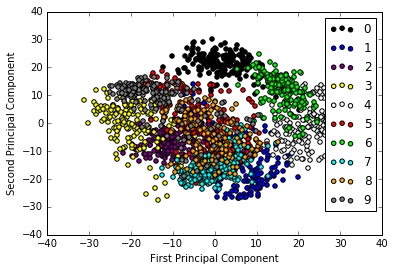

In [28]:
from sklearn.decomposition import PCA
estimator = PCA(n_components=10)
X_pca = estimator.fit_transform(X_digits)
plot_pca_scatter()

From the preceding figure, we can draw a few interesting conclusions:
- We can view the 10 different classes corresponding to the 10 digits at first
sight. We see that for most classes, their instances are clearly grouped in
clusters according to their target class, and also that the clusters are relatively
distinct. The exception is the class corresponding to the digit 5 with instances
very sparsely distributed over the plane overlap with the other classes.
- At the other extreme, the class corresponding to the digit 0 is the most
separated cluster. Intuitively, this class may be the one that is easiest to
separate from the rest; that is, if we train a classifier, it should be the class
with the best evaluation figures.
- Also, for topological distribution, we may predict that contiguous classes
correspond to similar digits, which means they will be the most difficult to
separate. For example, the clusters corresponding to digits 9 and 3 appear
contiguous (which will be expected as their graphical representations are
similar), so it might be more difficult to separate a 9 from a 3 than a 9 from a
4, which is on the left-hand side, far from these clusters.